In [ ]:
import pandas as pd

df = pd.read_csv('/content/Soybean.csv')
display(df.head())

,Class,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,...,int.discolor,sclerotia,fruit.pods,fruit.spots,seed,mold.growth,seed.discolor,seed.size,shriveling,roots
0,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,diaporthe-stem-canker,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,diaporthe-stem-canker,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
4,diaporthe-stem-canker,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Shape of the DataFrame:", df.shape)
print("\nData Types of Columns:\n", df.info())
print("\nSummary Statistics of Numerical Features:\n", df.describe())
print("\nMissing Values per Column:\n", df.isnull().sum())
for column in df.select_dtypes(include=['object']).columns:
  print(f"\nUnique values in '{column}':\n{df[column].unique()}")
print("\nDistribution of Target Variable ('Class'):\n", df['Class'].value_counts())

Shape of the DataFrame: (683, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            683 non-null    object 
 1   date             682 non-null    float64
 2   plant.stand      647 non-null    float64
 3   precip           645 non-null    float64
 4   temp             653 non-null    float64
 5   hail             562 non-null    float64
 6   crop.hist        667 non-null    float64
 7   area.dam         682 non-null    float64
 8   sever            562 non-null    float64
 9   seed.tmt         562 non-null    float64
 10  germ             571 non-null    float64
 11  plant.growth     667 non-null    float64
 12  leaves           683 non-null    int64  
 13  leaf.halo        599 non-null    float64
 14  leaf.marg        599 non-null    float64
 15  leaf.size        599 non-null    float64
 16  leaf.shread      583 non-nul

In [ ]:
# Identify columns with missing values
cols_with_missing = df.columns[df.isnull().any()]

# Handle missing values by imputing with the mode for categorical columns
for col in cols_with_missing:
  if df[col].dtype == 'object':
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    # For numerical columns, we can also use the mean or median for imputation, but for now, let's stick to the mode
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that there are no more missing values
print("Missing Values per Column:\n", df.isnull().sum())

Missing Values per Column:
 Class              0
date               0
plant.stand        0
precip             0
temp               0
hail               0
crop.hist          0
area.dam           0
sever              0
seed.tmt           0
germ               0
plant.growth       0
leaves             0
leaf.halo          0
leaf.marg          0
leaf.size          0
leaf.shread        0
leaf.malf          0
leaf.mild          0
stem               0
lodging            0
stem.cankers       0
canker.lesion      0
fruiting.bodies    0
ext.decay          0
mycelium           0
int.discolor       0
sclerotia          0
fruit.pods         0
fruit.spots        0
seed               0
mold.growth        0
seed.discolor      0
seed.size          0
shriveling         0
roots              0
dtype: int64


In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, dummy_na=True)

display(df_encoded.head())

,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,germ,...,Class_diaporthe-stem-canker,Class_downy-mildew,Class_frog-eye-leaf-spot,Class_herbicide-injury,Class_phyllosticta-leaf-spot,Class_phytophthora-rot,Class_powdery-mildew,Class_purple-seed-stain,Class_rhizoctonia-root-rot,Class_nan
0,6.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
1,4.0,0.0,2.0,1.0,0.0,2.0,0.0,2.0,1.0,1.0,...,True,False,False,False,False,False,False,False,False,False
2,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,...,True,False,False,False,False,False,False,False,False,False
3,3.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,...,True,False,False,False,False,False,False,False,False,False
4,6.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,2.0,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
df_sample = df_encoded.sample(n=5)
display(df_sample)

,date,plant.stand,precip,temp,hail,crop.hist,area.dam,sever,seed.tmt,germ,...,Class_diaporthe-stem-canker,Class_downy-mildew,Class_frog-eye-leaf-spot,Class_herbicide-injury,Class_phyllosticta-leaf-spot,Class_phytophthora-rot,Class_powdery-mildew,Class_purple-seed-stain,Class_rhizoctonia-root-rot,Class_nan
260,5.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,False,False,True,False,False,False,False,False,False,False
376,2.0,1.0,2.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,True,False,False,False,False
533,5.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
346,4.0,1.0,1.0,2.0,0.0,3.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,True,False,False,False,False
513,4.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


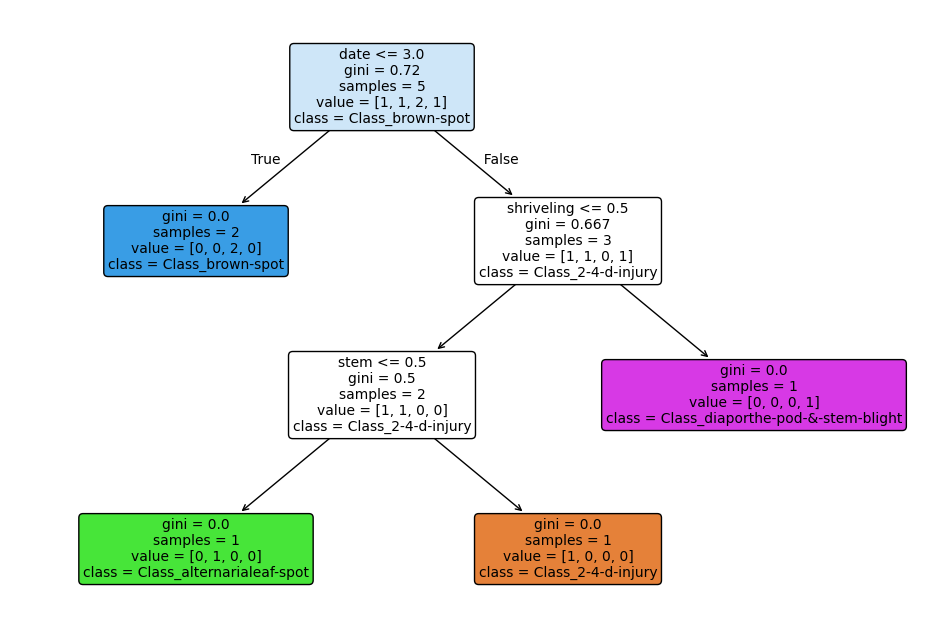

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_sample = df_encoded.sample(n=5, random_state=42)
target_cols = [col for col in df_sample.columns if col.startswith('Class_')]
X = df_sample.drop(columns=target_cols)
y = df_sample[target_cols]

if isinstance(y, pd.DataFrame):
    y = y.idxmax(axis=1)

decision_tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree_model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=X.columns.tolist(),
          class_names=[str(c) for c in decision_tree_model.classes_],
          filled=True, rounded=True, fontsize=10)
plt.show()


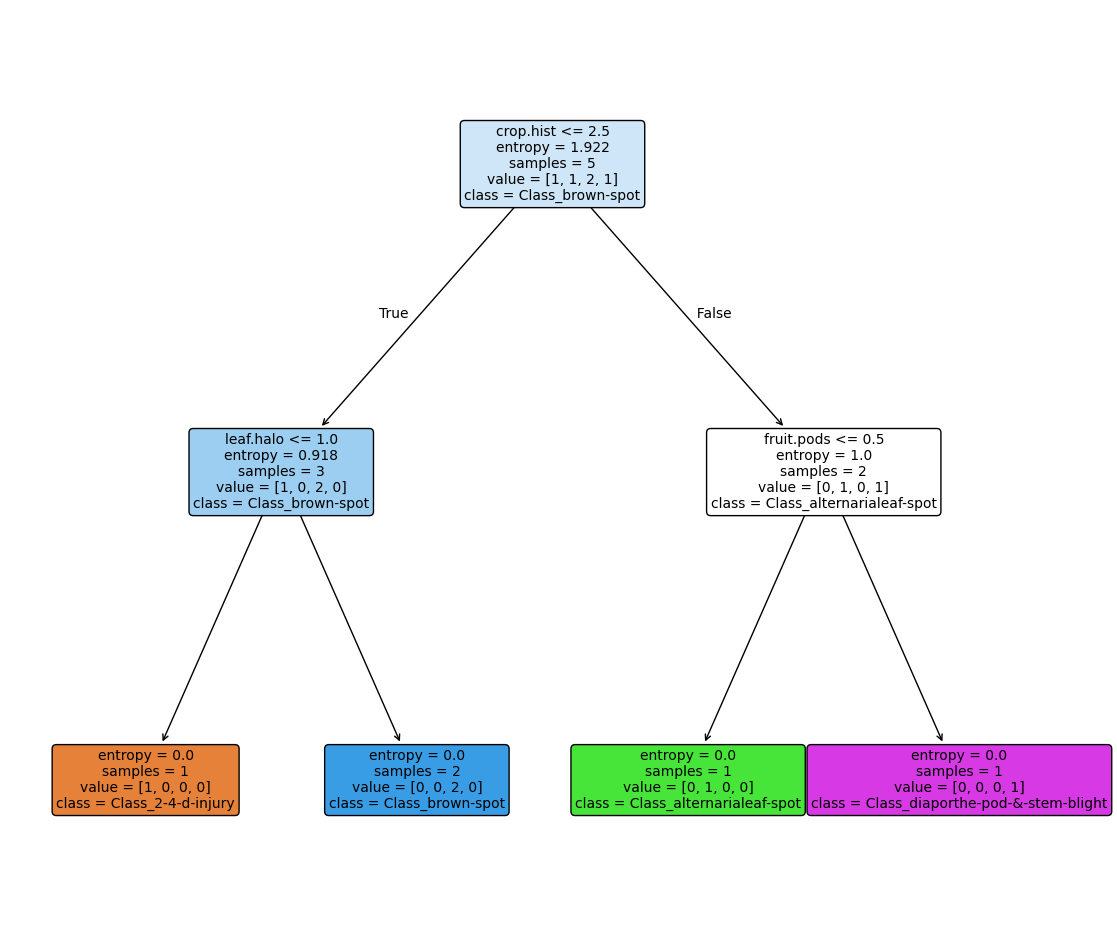

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_sample = df_encoded.sample(n=5, random_state=42)

target_cols = [col for col in df_sample.columns if col.startswith('Class_')]
X = df_sample.drop(columns=target_cols)
y = df_sample[target_cols]
if isinstance(y, pd.DataFrame):
    y = y.idxmax(axis=1)

decision_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
decision_tree_model.fit(X, y)

plt.figure(figsize=(14,12))
plot_tree(decision_tree_model, feature_names=X.columns,
          class_names=[str(c) for c in decision_tree_model.classes_],
          filled=True, rounded=True, fontsize=10)
plt.show()
